<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/XGB/AXELDAVID_1103210017_TK4504_XGB_MELB-DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
XGB<br>


# Import Library

In [1]:
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
from google.colab import drive

# Import Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d gunjanpathak/melb-data

  0% 0.00/614k [00:00<?, ?B/s]
100% 614k/614k [00:00<00:00, 39.0MB/s]


In [4]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/melb-data.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [11]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/melb_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [12]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
df.tail()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
18395,23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26/08/2017,6.3,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


# Data Cleaning

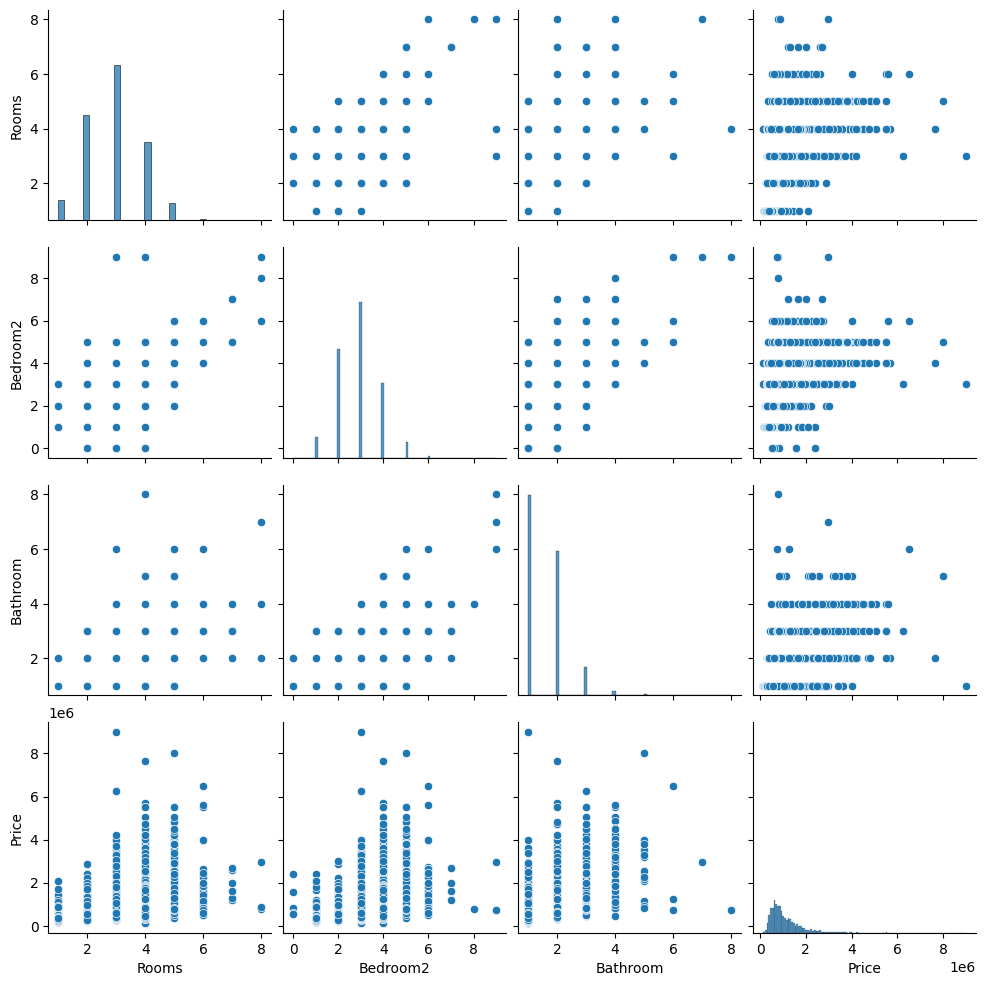

In [18]:
df.dropna(inplace=True)
selected_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Price']
df = df[selected_columns]

sns.pairplot(df)
plt.show()

# Feature Selection

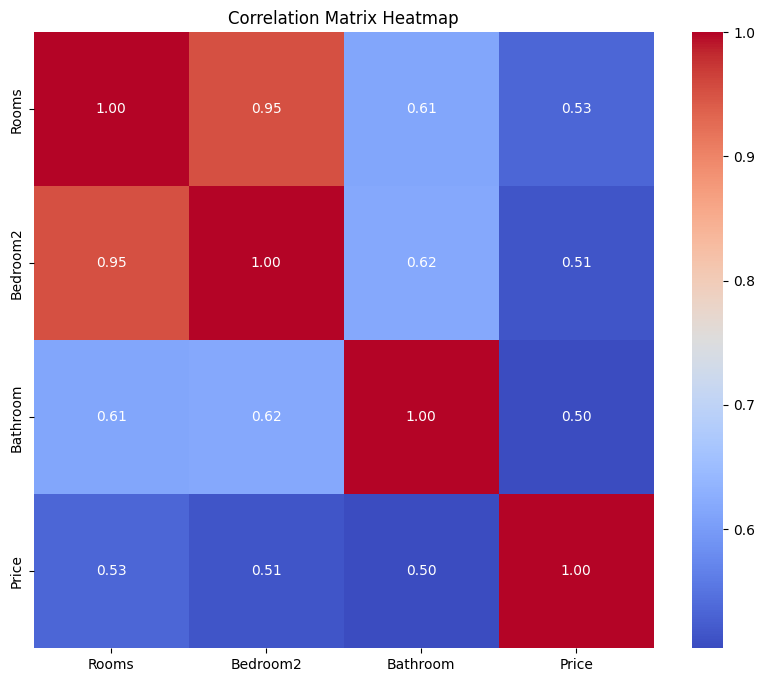

In [19]:
numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Train Model

In [20]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

# Data Evaluation

In [23]:
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("XGBoost MAE:", xgb_mae)
print("Random Forest MAE:", rf_mae)
print("Decision Tree MAE:", dt_mae)

XGBoost MAE: 372792.985560113
Random Forest MAE: 371288.8849896535
Decision Tree MAE: 373239.7548212597
